<a href="https://colab.research.google.com/github/BBMRI-ERIC/ISO23494-PROV-demonstrator/blob/main/Part%203%20-%20Provenance%20of%20Biological%20Specimen/examples-2023/fullProvChainBiobanking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#
# INSTALL PACKAGES
#
!pip install prov
!pip install rdflib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.5/421.5 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 528.1/528.1 kB 38.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 4.4 MB/s eta 0:00:00


In [53]:
import prov.model as prov
import json
import io


from prov.dot import prov_to_dot
from IPython.display import SVG

from rdflib import Graph

document = prov.ProvDocument()

document.set_default_namespace('https://github.com/BBMRI-ERIC/ISO23494-PROV-demonstrator/tree/main/Part%203%20-%20Provenance%20of%20Biological%20Specimen/examples-2023/')
document.add_namespace('cpm',   'http://commonprovenancemodel.org/')
document.add_namespace('pbm',   'http://provenanceofbiologicalmaterial.org/')
document.add_namespace('obo',   'http://purl.obolibrary.org/obo/')
document.add_namespace('sphn',  'https://biomedit.ch/rdf/sphn-ontology/sphn#')
document.add_namespace('snomed','http://snomed.info/id/')
document.add_namespace('loinc', 'https://biomedit.ch/rdf/sphn-resource/loinc/')
document.add_namespace('geosparql', 'http://www.opengis.net/ont/geosparql#')

document.add_namespace('biobank',       'http://biobank.demo/')
document.add_namespace('pathologylab',  'http://pathologylab.demo/')
document.add_namespace('hospital',      'http://hospital.demo/')

######## BUNDLE OF THE BIOBANK
biobankBundle = document.bundle('biobank:prov_of_study_slide_sample_007')
biobank_names = ["Bella Bison", "Blake Baboon", "Brooke Bat", "Brock Bear", "Brianna Badger"]

for i, name in enumerate(biobank_names, start=1):
       biobankBundle.agent(f'biobank:WORKER_{+i}', {prov.PROV_TYPE: 'prov:Person', 'name': name})

# connector
biobankBundle.entity('biobank:connector_of_sample_215784545', (
    (prov.PROV_TYPE, 'cpm:senderConnector'),))
biobankBundle.specializationOf('biobank:sample_215784545', 'biobank:connector_of_sample_215784545')

# sample, delivered to researcher
sample_215784545 = biobankBundle.entity('biobank:sample_215784545', (
    (prov.PROV_TYPE, 'pbm:sampleEntity'),
    (prov.PROV_TYPE, 'obo:OBIB_0000661'),                             # H&E-stained fixed tissue slide specimen
    ('prov:label', "the sample delivered from the biobank to the researcher"),
    ('cpm:externalID', "demo-study:sample007"),             # human readable label
    ('cpm:externalID', "89612183-8fa1-4b71-adff-92754fb48a4b"),       # barcode
    ('pbm:hasPreservation', 'obo:OBIB_000067')
    ))

biobankBundle.activity('biobank:act_57585', '2020-11-23T10:22:01.024000+01:00','2020-11-21T08:15:00.024000+01:00', {prov.PROV_TYPE: 'pbm:distributionActivity'})
biobankBundle.wasAssociatedWith('biobank:act_57585', 'biobank:WORKER_1',None,None, {prov.PROV_ROLE: 'sort in'})
biobankBundle.used('biobank:act_57585', 'biobank:sample_215784545')

# relabeling
biobankBundle.activity('biobank:act_57584', '2020-11-22T08:15:01.024000+01:00', None, {prov.PROV_TYPE: "pbm:Processing"})

biobankBundle.wasAssociatedWith('biobank:act_57584', 'biobank:WORKER_2',None,None, {prov.PROV_ROLE: "sort in"})
biobankBundle.used('biobank:sample_215784544','biobank:act_57584' )

biobankBundle.wasDerivedFrom('biobank:sample_215784545' ,'biobank:sample_215784544')
biobankBundle.wasGeneratedBy('biobank:sample_215784545', 'biobank:act_57584')


# retrieval from the storage
sample_215784544 = biobankBundle.entity('biobank:sample_215784544', (
    (prov.PROV_TYPE, 'pbm:sampleEntity'),
    (prov.PROV_TYPE, 'obo:OBIB_0000661'),                               # H&E-stained fixed tissue slide specimen
    ('prov:label', "sample taken out of the storage"),
    ('cpm:externalID', "2007-PAT-34441208197199889-7780-BLK-LY-CUT07"),
    ('pbm:hasPreservation', 'obo:OBIB_000067')
    ))

biobankBundle.activity('biobank:act_15754', '2020-11-21T12:00:01.024000+01:00',None,
                                { prov.PROV_TYPE: "pbm:retrievalActivity",
                                  'prov:label':"retrieve slide from drawer"
                                }
                                )

biobankBundle.wasAssociatedWith('biobank:act_15754', 'biobank:WORKER_3',None,None, {prov.PROV_ROLE: "pick"})
biobankBundle.used('biobank:act_15754','biobank:sample_889-7780-BLK-LY-CUT07')
biobankBundle.wasDerivedFrom('biobank:sample_215784544' ,'biobank:sample_889-7780-BLK-LY-CUT07')
biobankBundle.wasGeneratedBy('biobank:sample_215784544', 'biobank:act_15754')

# storing the sample

biobankBundle.entity('biobank:drawerBox12', (
      (prov.PROV_TYPE, 'pbm:deviceEntity'),
       ('prov:label',"Drawer Box 12"),
       ('cpm:externalID', "DB12"),
       ))


biobankBundle.activity('biobank:act_57582', '2010-10-15T14:30:01.024000+01:00','2020-11-21T12:00:01.024000+01:00',
                                { prov.PROV_TYPE: 'pbm:storageActivity',
                                  prov.PROV_TYPE: 'obo:OBI_0000977', # Paraffin Storage
                                  'prov:label':"long term storage activity auf a tissue slide",
                                  'pbm.toEnvironment': 'OBO:NCIT_C70719' # Specimen at Room Temperature
                                }
                                )

biobankBundle.wasAssociatedWith('biobank:act_57582', 'biobank:WORKER_3',None,None, {prov.PROV_ROLE: "sort in"})
biobankBundle.used('biobank:act_57582', 'biobank:sample_889-7780-BLK-LY-CUT07' )
biobankBundle.used('biobank:act_57582','biobank:drawerBox12')

# receivment of the sample in the biobank
biobankBundle.activity('biobank:act_57582r', '2010-10-15T11:30:01.024000+01:00','2010-10-15T11:30:01.024000+01:00',
                                { prov.PROV_TYPE: 'pbm:receivmentActivity',
                                  'prov:label':"recieve the sample in the biobank",
                                }
                                )

biobankBundle.wasAssociatedWith('biobank:act_57582r', 'biobank:WORKER_3',None,None, {prov.PROV_ROLE: "receivment"})
biobankBundle.used('biobank:act_57582r', 'biobank:sample_889-7780-BLK-LY-CUT07' )

biobankBundle.entity('biobank:sample_889-7780-BLK-LY-CUT07', (
    (prov.PROV_TYPE, 'pbm:sampleEntity'),
    (prov.PROV_TYPE, 'obo:OBIB_0000661'),                               # H&E-stained fixed tissue slide specimen
    ('prov:label', "sample received in the biobank"),
    ('cpm:externalID', "2007-PAT-34441208197199889-7780-BLK-LY-CUT07"),
    ('pbm:hasPreservation', 'obo:OBIB_000067')
    ))

pathologyBundle.specializationOf('biobank:sample_889-7780-BLK-LY-CUT07', 'pathologylab:connector_of_sample_215784544')

biobankBundle.entity('pathologylab:connector_of_sample_215784544', ((prov.PROV_TYPE, 'cpm:receiverConnector'),))
biobankBundle.entity('biobank:externalInputConnector_of_sample_215784544', ((prov.PROV_TYPE, 'cpm:externalInputConnector'),))
biobankBundle.activity('biobank:receipt_of_sample_215784544',None ,None, { prov.PROV_TYPE: 'cpm:receiptActivity'} )

########  BUNDLE OF THE PATHOLOGY LABORATORY
pathologyBundle = document.bundle('pathologylab:prov_of_study_slide_2007-PAT-34441208197199889-7780-BLK-LY-CUT07')
pathology_names = ["Parker Penguin", "Penelope Parrot", "Patrick Panther", "Paige Peacock"]

for i, name in enumerate(pathology_names, start=1):
       pathologyBundle.agent(f'pathologylab:WORKER_{+i}', {prov.PROV_TYPE: 'prov:Person', 'name': name})

# connector
pathologyBundle.entity('pathologylab:connector_of_sample_215784544', ((prov.PROV_TYPE, 'cpm:sender´Connector'),))
pathologyBundle.specializationOf('pathologylab:sample_215784544', 'pathologylab:connector_of_sample_215784544')

pathologyBundle.activity('pathologylab:act-transport01',
                         "2010-10-15T11:00:01.024000+01:00",
                         "2010-10-15T11:30:01.024000+01:00",
                                { prov.PROV_TYPE: 'pbm:transportActivity',
                                  'prov:label':'transport of the slide to the biobank after the diagnostic process is finished'
                                }
                                )

pathologyBundle.used('pathologylab:act-transport01', 'pathologylab:sample_215784544' )
biobankBundle.wasAssociatedWith('pathologylab:act-transport01', 'pathologylab:WORKER_3',None,None, {prov.PROV_ROLE: "transport"})

pathologyBundle.entity('pathologylab:sample_215784544', (
    (prov.PROV_TYPE, 'pbm:sampleEntity'),
    (prov.PROV_TYPE, 'obo:OBIB_0000661'),                               # H&E-stained fixed tissue slide specimen
    ('prov:label', "sample used in the pathologylab"),
    ('cpm:externalID', "2007-PAT-34441208197199889-7780-BLK-LY-CUT07"),
    ('pbm:hasPreservation', 'obo:OBIB_000067')
    ))

# cutting and staining a block to generate a slide
pathologyBundle.used('pathologylab:act_57581', 'pathologylab:sample_215784543' )
pathologyBundle.wasGeneratedBy('pathologylab:sample_215784544', 'pathologylab:act_57581')
pathologyBundle.wasDerivedFrom('pathologylab:sample_215784544' ,'pathologylab:sample_215784543')

pathologyBundle.activity('pathologylab:act_57581', "2010-10-12T16:15:01.024000+01:00",None,
                                { prov.PROV_TYPE: 'pbm:processingActivity',
                                  prov.PROV_TYPE: 'snomed:108256005',  #  Hematology Staining (procedure),
                                  prov.PROV_TYPE: 'obo:OBI_0000372',   #  material separation function; no better ontology found
                                  'prov:label':"cutting a block and staining the slide"
                                }
                                )
pathologyBundle.wasAssociatedWith('pathologylab:act_57581', 'pathologylab:WORKER_1',None,None, {prov.PROV_ROLE: "sample processing"})

pathologyBundle.entity('pathologylab:microtomeDevice21', (
      (prov.PROV_TYPE, "snomed:705219006"),
       ('prov:label',"Microtome"),
       ('cpm:externalID', "MT21")
       ))

# macroscopy, generating a block
sample_215784543 = pathologyBundle.entity('pathologylab:sample_215784543', (
    (prov.PROV_TYPE, 'pbm:sampleEntity'),
    (prov.PROV_TYPE, 'obo:OMIABIS_0000051'),
    ('cpm:externalID', "2007-PAT-34441208197199889-7780-BLK-LY"),
    ('pbm:hasPreservation', 'obo:OMIABIS_0000911')
    ))


pathologyBundle.wasDerivedFrom('pathologylab:sample_215784543' ,'pathologylab:primarysample_34441208197199889')
pathologyBundle.wasGeneratedBy('pathologylab:sample_215784543', 'pathologylab:act_57580')

pathologyBundle.activity('pathologylab:act_57580', "2010-10-11T09:22:01.024000+01:00",None,
                                { prov.PROV_TYPE: 'pbm:processingActivity',
                                  prov.PROV_TYPE: 'snomed:168126000', #  Sample macroscopy (procedure)
                                  'prov:label':'macroscopy, putting a lypmh nodes in a block'
                                }
                                )

pathologyBundle.wasAssociatedWith('pathologylab:act_57580', 'pathologylab:WORKER_2',None,None, {prov.PROV_ROLE: "sample processing"})


# receivment of the sample in the pathology
pathologyBundle.activity('pathologylab:act01', "2010-10-10T12:00:01.024000+01:00","2010-10-10T12:00:01.024000+01:00",
                                { prov.PROV_TYPE: 'pbm:receivmentActivity',
                                  'prov:label':"recieve the sample in the biobank",
                                }
                                )

pathologyBundle.wasAssociatedWith('pathologylab:act01', 'biobank:WORKER_3',None,None, {prov.PROV_ROLE: "receivment"})
pathologyBundle.used('pathologylab:act01', 'pathologylab:primarysample_34441208197199889' )

pathologyBundle.specializationOf('pathologylab:externalInputConnector_of_primarysample_34441208197199889', 'pathologylab:primarysample_34441208197199889')

pathologyBundle.entity('pathologylab:primarysample_34441208197199889', (
     (prov.PROV_TYPE, 'pbm:sampleEntity'),
     (prov.PROV_TYPE, 'obo:OMIABIS_0000052'),
    ('cpm:externalID', "2007-PAT-34441208197199889-7780-PS-01"),
    ('pbm:hasPreservation',  'sphn:PAXgeneTissue'),
    ('pbm:hasContainerType', 'sphn:PolypropyleneTubeSterile')
    ))


pathologyBundle.entity('hospital:connector_of_primarysample_34441208197199889', ((prov.PROV_TYPE, 'cpm:receiverConnector'),))
pathologyBundle.entity('pathologylab:externalInputConnector_of_primarysample_34441208197199889', ((prov.PROV_TYPE, 'cpm:externalInputConnector'),))
pathologyBundle.activity('pathologylab:receipt_of__sample_215784544',None ,None, { prov.PROV_TYPE: 'cpm:receiptActivity'} )


########  BUNDLE OF THE HOSPITAL
hospitalBundle = document.bundle('hospital:prov_of_primarysample_34441208197199889')
hospital_names = ["Hannah Hippo", "Henry Hedgehog", "Hazel Horse", "Harper Hawk", "Heidi Hamster"]

for i, name in enumerate(hospital_names, start=1):
       hospitalBundle.agent(f'hospital:WORKER_{+i}', {prov.PROV_TYPE: 'prov:Person', 'name': name})


# connector
hospitalBundle.entity('hospital:connector_of_primarysample_34441208197199889', ((prov.PROV_TYPE, 'cpm:senderConnector'),))
hospitalBundle.specializationOf('hospital:primarysample_34441208197199889', 'hospital:connector_of_primarysample_34441208197199889')

hospitalBundle.wasAssociatedWith('hospital:act02', 'hospital:WORKER_2',None,None, {prov.PROV_ROLE: "sample transport"})
hospitalBundle.used('hospital:act02', 'hospital:primarysample_34441208197199889' )

hospitalBundle.activity('hospital:act02', "2010-10-10T11:26:01.024000+01:00",
                                          "2010-10-10T12:00:01.024000+01:00",
                                { prov.PROV_TYPE: 'pbm:transportActivity',
                                  'prov:label':'transport of primary sample to pathology lab'
                                }
                                )

leftLaterality = hospitalBundle.entity('hospital:leftLaternity', (
    (prov.PROV_TYPE, 'sphn:Laterality'),
    ('sphn:hasCode', 'snomed:7771000')
    ))

bodySide = hospitalBundle.entity('hospital:BodySideSigmoidLymphNode', (
    (prov.PROV_TYPE, 'sphn:BodySite'),
    ('sphn:hasCode', 'snomed:278931004') # Entire sigmoid lymph node (body structure)
    ))

bodySide.add_attributes ({'sphn:hasLaterality': leftLaterality})

primarySample = hospitalBundle.entity('hospital:primarysample_34441208197199889', (
     (prov.PROV_TYPE, 'pbm:sampleEntity'),
     (prov.PROV_TYPE, 'obo:OMIABIS_0000052'),   #RPH like this or dedicted attribute for a sample type
    ('pbm:label', "2007-PAT-34441208197199889-7780-PS-01"),
    ('pbm:hasPreservation',  'sphn:PAXgeneTissue'),
    ('pbm:hasContainerType', 'sphn:PolypropyleneTubeSterile')
    ))

primarySample.add_attributes ({'sphn:hasBodySite': bodySide})

hospitalBundle.entity('hospital:patient34441208197199889', (
    (prov.PROV_TYPE, 'pbm:sourceEntity'),
    ('pbm:belongsToTaxonomy', 'obo:NCIT_C14225'), #Human
    ('pbm:label', "Franz, Musterman, 12.Aug.1971, 34441208197199889"),
    ('cpm:comment', "The value of the label is representation of a patient"), # example for a cpm:comment
    ('pbm:consentInformation',  'hospital:consent34441208197199889')
    ))

hospitalBundle.entity('hospital:consent34441208197199889', (
    (prov.PROV_TYPE, 'sphn:Consent'),
    ('sphn:hasTypeCode', 'snomed:385645004') #accepted
    ))

hospitalBundle.entity('hospital:location-LKH-west', (
    ('prov:type', 'geosparql:Feature'),
    ('geosparql:hasGeometry', "POINT(15.400062565074492 47.078053487297296)")  # Geospatial data as string literal
))

hospitalBundle.activity('hospital:act01', "2010-10-10T12:00:01.024000+01:00",
                                          "2010-10-10T12:26:01.024000+01:00",
                                { prov.PROV_TYPE: "pbm:acquisitionActivity",
                                  'prov:label':"acquisition of the primary sample",
                                  'pbm:atGeographicLocation':'hospital:location-LKH-west'
                                }
                                )

hospitalBundle.wasAssociatedWith('hospital:act01', 'hospital:WORKER_3',None,None, {prov.PROV_ROLE: "Surgeon",prov.PROV_ROLE:'snomed:394584008' }) #Gastroenterology
hospitalBundle.wasGeneratedBy('hospital:primarysample_34441208197199889', 'hospital:act01')
hospitalBundle.wasDerivedFrom('hospital:primarysample_34441208197199889' ,'hospital:patient34441208197199889')

document.get_provn() # =>

provn = document.serialize(format='provn')
#print(provn)



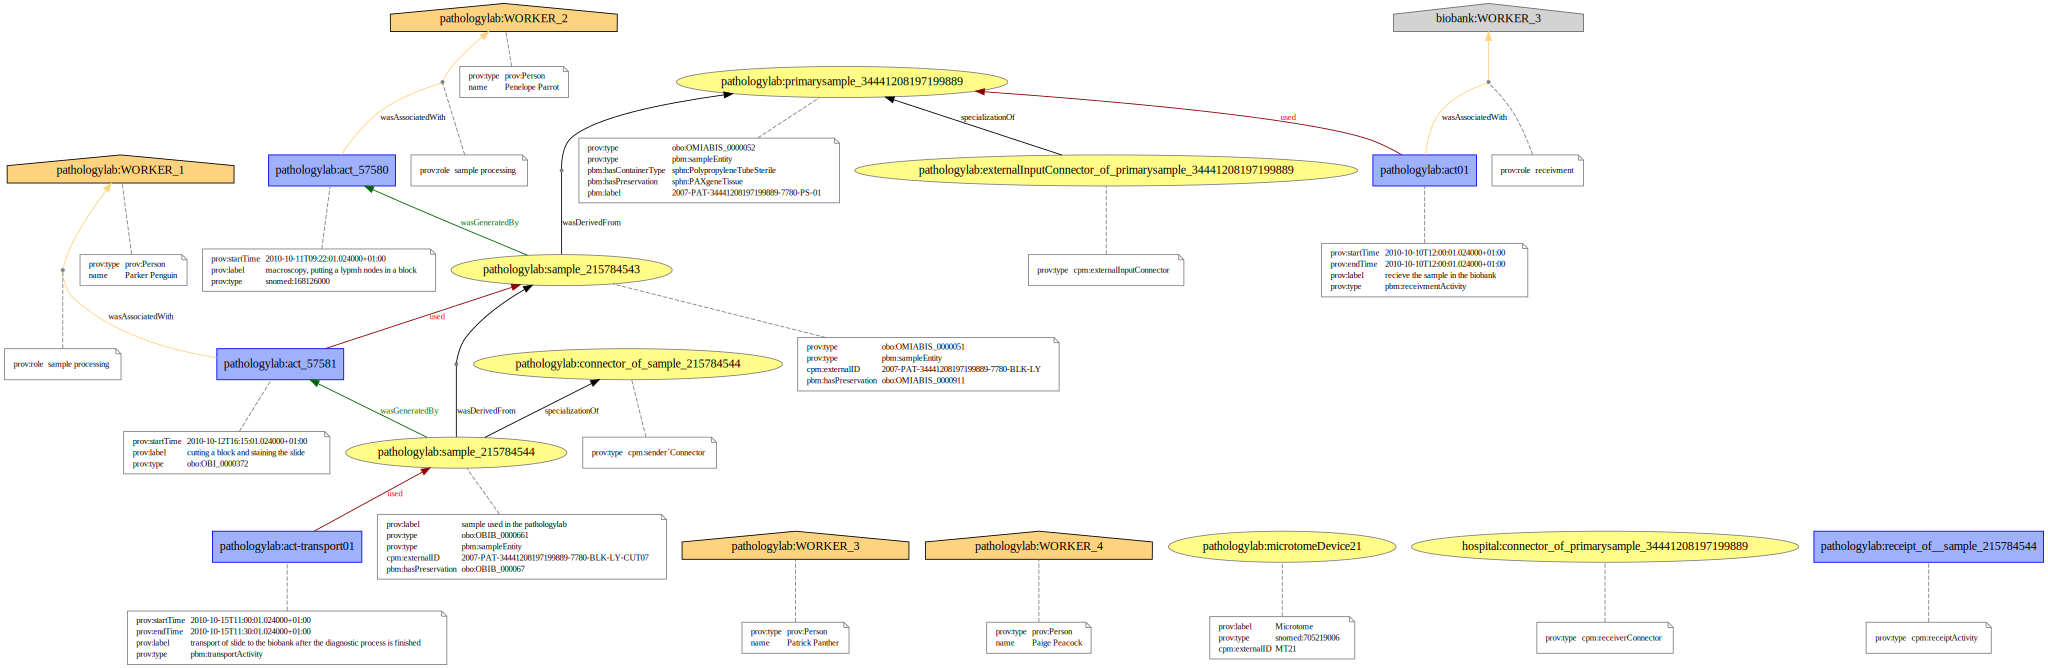

In [49]:
dotrep =   prov_to_dot(pathologyBundle)
svg_content = dotrep.create(format="svg", encoding="utf-8")
SVG(svg_content)


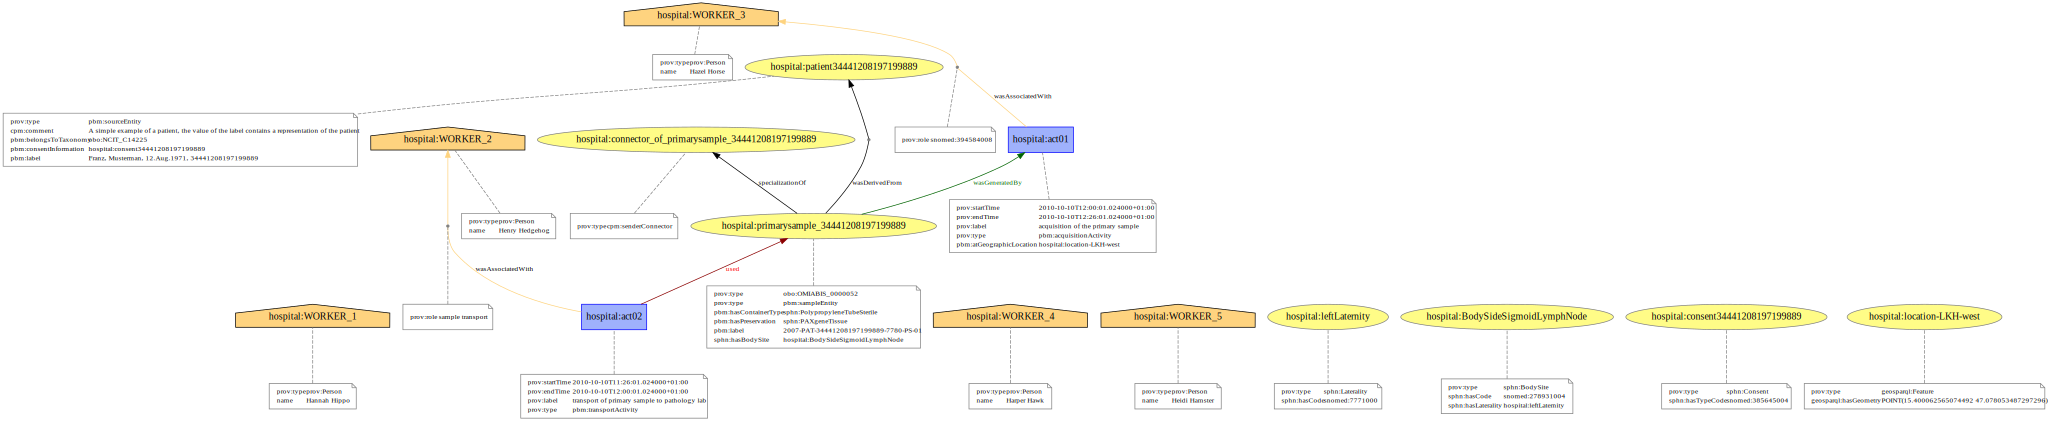

In [48]:
dotrep =   prov_to_dot(hospitalBundle)
svg_content = dotrep.create(format="svg", encoding="utf-8")
SVG(svg_content)

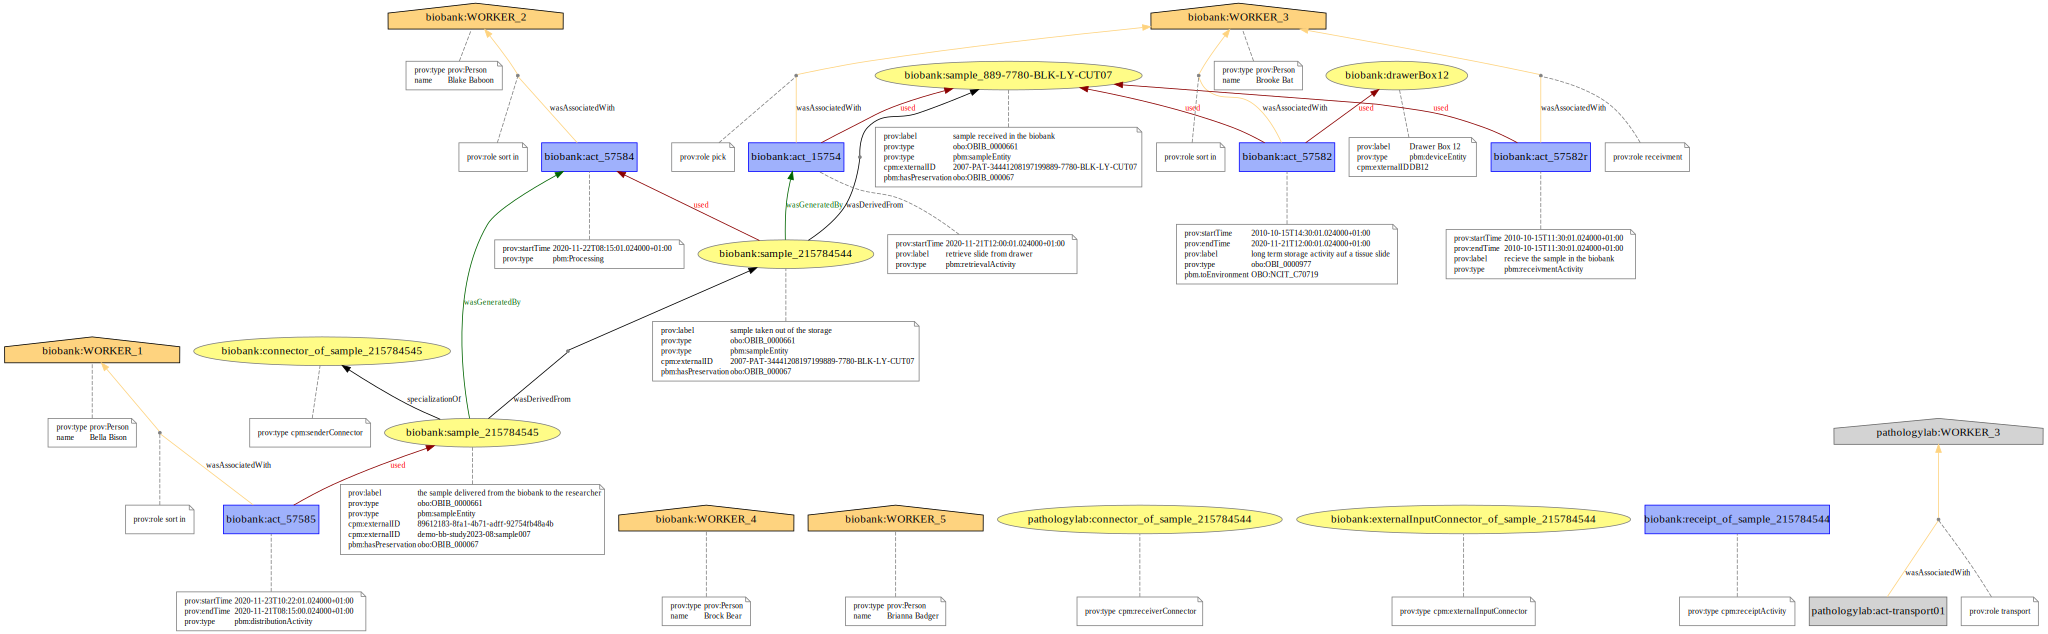

In [50]:
dotrep =   prov_to_dot(biobankBundle)
svg_content = dotrep.create(format="svg", encoding="utf-8")
SVG(svg_content)